# Summarizing Categorical Data & Pearson Correlation
Categorical value accepts limited & fixed number of values. Its like every observation is associated to one group represented by an element of categorical variable.
e.g. : van, truck, train, ship - Vehical Variable

Cross Tabulation is a function  that summarizes or combines 2 or more features. By default, cross tabs show frequency counts for features.


In [1]:
import numpy as np
import pandas as pd


In [2]:
address = '/Users/dhanashreepokale/Downloads/Ex_Files_Python_Data_Science_EssT/Exercise Files/Ch01/01_05/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars.head()



,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
carb = cars.carb
carb.value_counts()

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64

In [8]:
# subset of categorical variables
cars_cat = cars[['cyl','vs','am','gear','carb']]
cars_cat.head()

,cyl,vs,am,gear,carb
0,6,0,1,4,4
1,6,0,1,4,4
2,4,1,1,4,1
3,6,1,0,3,1
4,8,0,0,3,2


In [11]:
gears_group = cars_cat.groupby('gear')
gears_group.describe()

am       carb        cyl         vs
gear                                                  
3    count  15.000000  15.000000  15.000000  15.000000
     mean    0.000000   2.666667   7.466667   0.200000
     std     0.000000   1.175139   1.187234   0.414039
     min     0.000000   1.000000   4.000000   0.000000
     25%     0.000000   2.000000   8.000000   0.000000
     50%     0.000000   3.000000   8.000000   0.000000
     75%     0.000000   4.000000   8.000000   0.000000
     max     0.000000   4.000000   8.000000   1.000000
4    count  12.000000  12.000000  12.000000  12.000000
     mean    0.666667   2.333333   4.666667   0.833333
     std     0.492366   1.302678   0.984732   0.389249
     min     0.000000   1.000000   4.000000   0.000000
     25%     0.000000   1.000000   4.000000   1.000000
     50%     1.000000   2.000000   4.000000   1.000000
     75%     1.000000   4.000000   6.000000   1.000000
     max     1.000000   4.000000   6.000000   1.000000
5    count   5.000000   5.000000   5.000000   5.000000
     mean    1.000000   4.400000   6.000000   0.200000
     std     0.000000   2.607681   2.000000   0.447214
     min     1.000000   2.000000   4.000000   0.000000
     25%     1.000000   2.000000   4.000000   0.000000
     50%     1.000000   4.000000   6.000000   0.000000
     75%     1.000000   6.000000   8.000000   0.000000
     max     1.000000   8.000000   8.000000   1.000000

In [13]:
# Create categorical variable
cars['group'] = pd.Series(cars.gear, dtype="category")
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,group
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,4
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,3
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,3


In [14]:
cars['group'].dtype

category

In [15]:
cars['group'].value_counts()

3    15
4    12
5     5
Name: group, dtype: int64

In [16]:
# creating cross tabs
pd.crosstab(cars['am'],cars['gear'])

gear,3,4,5
am,,,
0,15,4,0
1,0,8,5


Assessing correlation between variables
Parametric Correlation Variables - Correlation doesnot imply causation
Assumptions of Pearson Correlation - Normal distribution of data, continuous and numeric data, variables are linearly related.


In [18]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

import scipy
from scipy.stats.stats import pearsonr

 # this lets plots to be plotted in same window
%matplotlib inline
rcParams['figure.figsize'] = 10, 5 # 5 inch cross 4 inch figures
sb.set_style('whitegrid')

In [19]:
address = '/Users/dhanashreepokale/Downloads/Ex_Files_Python_Data_Science_EssT/Exercise Files/Ch01/01_05/mtcars.csv'
cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


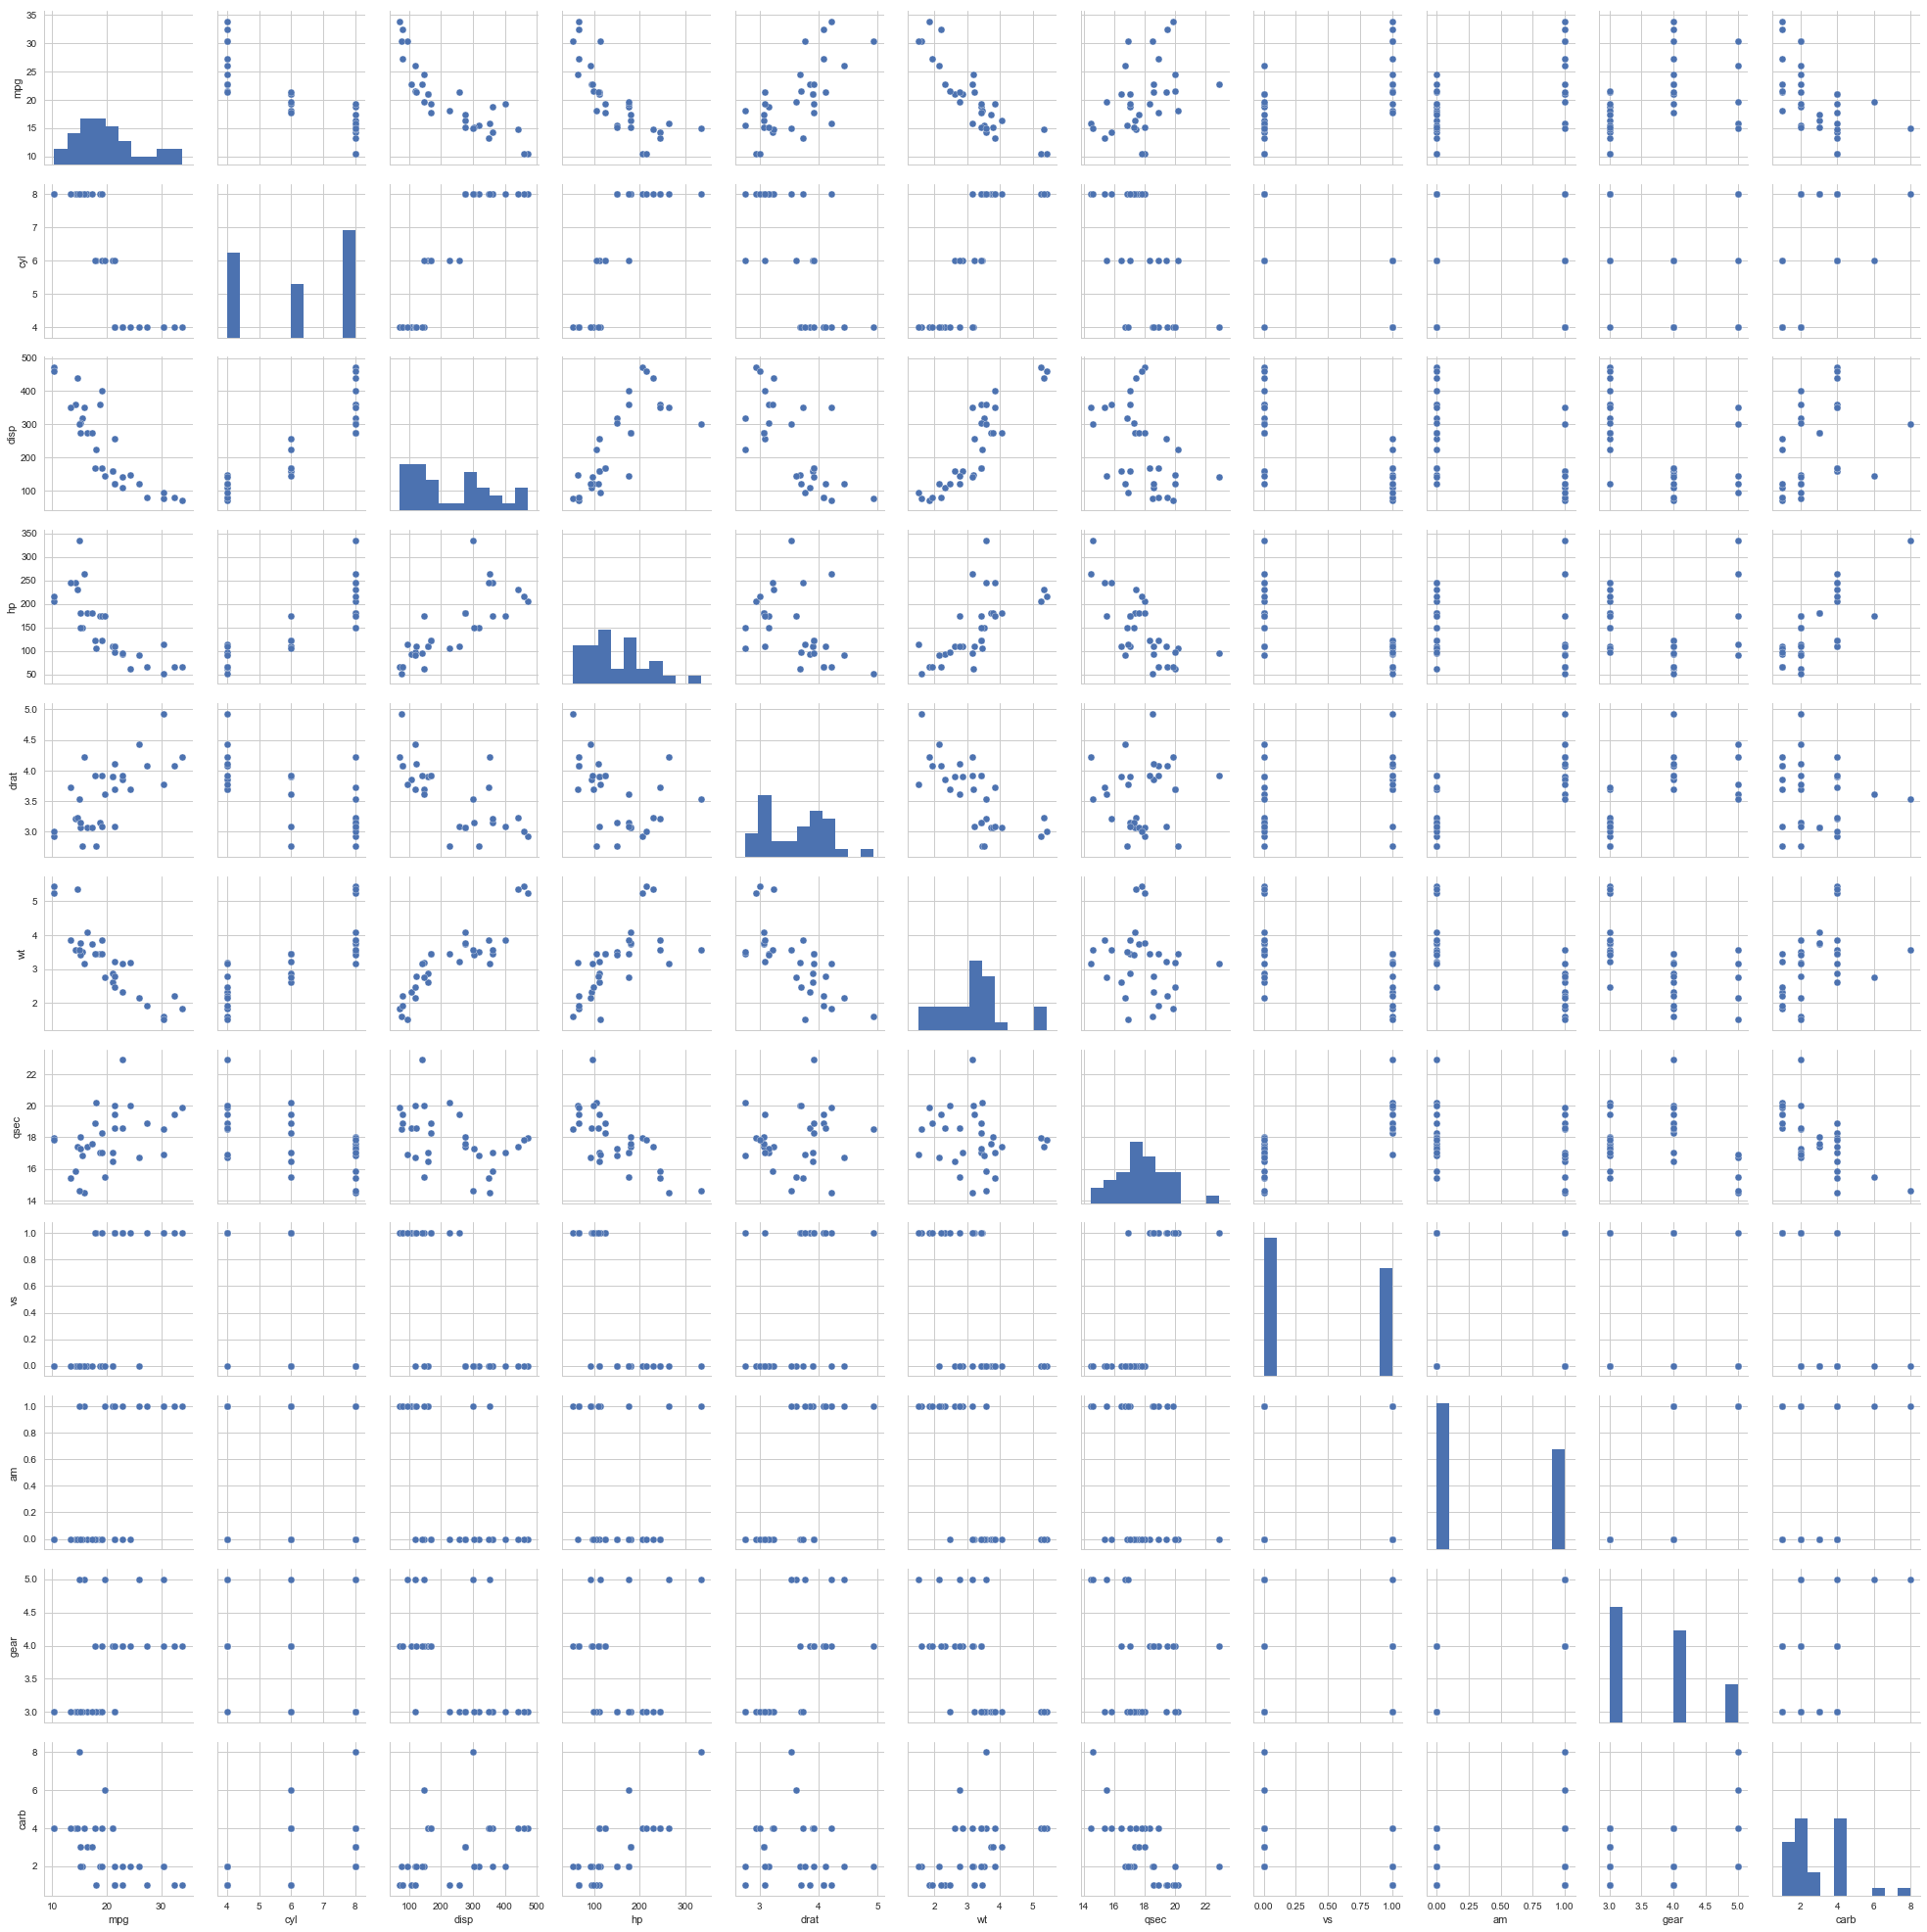

In [21]:
sb.pairplot(cars)

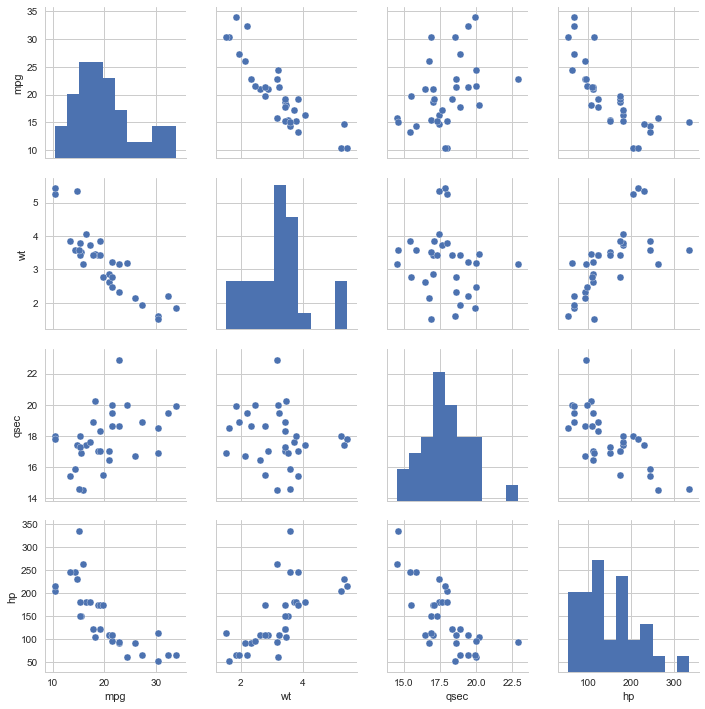

In [25]:
X = cars[['mpg','wt','qsec','hp']]
sb.pairplot(X) # from the graphs we see that 3 assumptions of pearson correlation are satisfied

In [26]:
# using scipy for analysing pearson correlation
mpg = cars['mpg']
hp = cars['hp']
qsec = cars['qsec']
wt = cars['wt']

In [34]:
pearsonr_coefficient, p_value = pearsonr(mpg,hp)
print (pearsonr_coefficient)

-0.776168371827


In [36]:
pearsonr_coefficient, p_value = pearsonr(mpg,qsec)
print (pearsonr_coefficient)

0.418684033922


In [39]:
corr =X.corr() # simple way using pandas

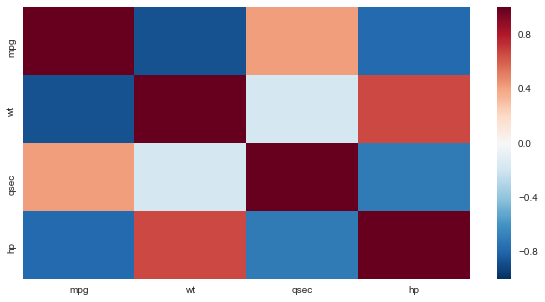

In [40]:
sb.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)